In [1]:
from tool.preprocess import Preprocess
from tool.s3_connect import S3_connector
from textrank import run_textrank
import pandas as pd
from wordToVector import WordToVector
from tqdm import tqdm
from database.db import *
from tqdm import tqdm

In [2]:
s3_connector = S3_connector()
run = run_textrank.RunTextRank()
keys = run.key_extractor()
w = WordToVector()

In [3]:
ids = get_preprocessed_news_ids()

In [4]:
len(ids)

87175

In [5]:
ids = ids[0:10000]

In [45]:
headline

[('101-056-0010924073',
  '공시가격 90%까지 현실화…속도 차이는 ‘9억 원’',
  '{가격,경우,주택,현실,공시,부동산}',
  '{"앵커 정부가 아파트와 단독주택 토지 등 모든 부동산의 공시가격 현실화율을 90%까지 높이기로 했습니다","9억 원 미만 공동주택의 경우 처음 3년간은 연 1%p 미만으로 상승 폭을 조절합니다","상대적으로 낮은 가격의 부동산 공시가격이 급격히 뛰어 서민층의 세금 부담이 커지게 되는 것을 막기 위한 취지입니다"}'),
 ('101-629-0000048969',
  '배터리 분사 주총 앞둔 LG화학 2대 주주 국민연금 반대 변수',
  '{화학,자문,의결권,배터리,국민,연금,사업,반대,주주,기업}',
  '{"LG화학 관계자는 세계 최대 의결권 자문기관인 ISS를 비롯해 한국기업지배연구원 등 국내외 의결권 자문사들이 대부분 찬성한 사안인데 국민연금의 반대 의견에 대해 매우 아쉽게 생각한다 며 이번 분할은 배터리 사업을 세계 최고 에너지 솔루션 기업으로 육성해 주주가치와 기업가치를 높이려는 것으로 주총때까지 적극적으로 소통하겠다 고 말했다.","LG화학은 27일 국민연금의 배터리 분할 안건 반대에 대해 국내외 의결권 자문사들이 대부분 찬성한 사안인데 아쉽게 생각한다 며 주총때까지 적극적으로 소통하겠다 고 말했다","특히 해당 안건건에 대해 국민연금의 의결권 자문을 맡고 있는 한국기업지배구조원 세계 최대 의결권 자문사인 ISS 글래스루이스 대신지배구조연구소 등 국내외 주요 의결권 자문사들의 찬성 의견을 받았기 때문에 LG화학의 배터리 사업 분사는 큰 이변이 없는 한 유력한 상황이었다"}'),
 ('101-417-0000610691',
  '코로나19 치료제·백신 19개 임상중… 개발사는 어디',
  '{치료제,임상,백신,임상시험,진행,코로나}',
  '{"국내에서 진행 중인 코로나19 치료제·백신 관련 임상시험이 총 19건으로 집계됐다","제약업체가 진행하는 임상시험은 1상 임상 6건 항체치료제 DNA백신 등 

In [46]:
headline = []
for i in tqdm(ids):
    headline.append(get_header(i[1]))


100%|██████████| 10000/10000 [02:27<00:00, 67.80it/s]


In [47]:
vectors = []
key_sentence = []
keywords = []
index = []
for i, j, k in ids:
    index.append(i)
    key_sentence.append(j[1:-1].split(","))
    keywords.append(k[1:-1].split(","))
    vectors.append(w.vectorize_word_list(k[1:-1].split(",")))
    

In [48]:
headline = list(map(lambda x : [x[1]], headline))

TypeError: 'NoneType' object is not subscriptable

In [50]:
df = pd.DataFrame({'news_id':index,'key_sentence':key_sentence,'keywords':keywords,'vectors':vectors})
df.head()

,news_id,key_sentence,keywords,vectors
0,101-056-0010924073,"[""앵커 정부가 아파트와 단독주택 토지 등 모든 부동산의 공시가격 현실화율을 90%...","[가격, 경우, 주택, 현실, 공시, 부동산]","[-0.046616834, -0.16050799, 0.57576084, 0.6333..."
1,101-629-0000048969,"[""LG화학 관계자는 세계 최대 의결권 자문기관인 ISS를 비롯해 한국기업지배연구원...","[화학, 자문, 의결권, 배터리, 국민, 연금, 사업, 반대, 주주, 기업]","[0.5706908, -0.14262912, 0.46320367, 0.0892919..."
2,101-417-0000610691,"[""국내에서 진행 중인 코로나19 치료제·백신 관련 임상시험이 총 19건으로 집계됐...","[치료제, 임상, 백신, 임상시험, 진행, 코로나]","[-0.5760984, 0.13250549, 0.0014357058, 0.22750..."
3,101-277-0004780222,"[""공식 출시 전 올해 인도 물량 300대 완판 올 뉴 지프 글래디에이터와 1호 차...","[지프, 이터, 전달, 대사, 홍보, 브랜드]","[0.05545782, 0.50270873, 0.11126624, 0.0081252..."
4,101-421-0004952350,"[""그린 테마 콘퍼런스에 투자세션까지 알찬 구성 서울 뉴스1 국회수소경제포럼이 주최...","[수소, 투자, 그린, 뉴딜, 정책, 증권, 연구]","[0.9800325, 0.22498158, 0.89963806, 0.5875823,..."


In [24]:
from scipy.spatial import distance


In [70]:
cosine = {}
for i in range(2,len(df)):
    cosine[i] = 1 - distance.cosine(df['vectors'][1], df['vectors'][i])

In [71]:
cosine_new = list(cosine.items())

In [72]:
cosine_new.sort(key=lambda x:x[1], reverse=True)

In [74]:
print(f"base : {df['key_sentence'][1]}")

for i,j in cosine_new:
    print(f"{i} {df['key_sentence'][i]}  | {j}")

base : ['"LG화학 관계자는 세계 최대 의결권 자문기관인 ISS를 비롯해 한국기업지배연구원 등 국내외 의결권 자문사들이 대부분 찬성한 사안인데 국민연금의 반대 의견에 대해 매우 아쉽게 생각한다 며 이번 분할은 배터리 사업을 세계 최고 에너지 솔루션 기업으로 육성해 주주가치와 기업가치를 높이려는 것으로 주총때까지 적극적으로 소통하겠다 고 말했다."', '"LG화학은 27일 국민연금의 배터리 분할 안건 반대에 대해 국내외 의결권 자문사들이 대부분 찬성한 사안인데 아쉽게 생각한다 며 주총때까지 적극적으로 소통하겠다 고 말했다"', '"특히 해당 안건건에 대해 국민연금의 의결권 자문을 맡고 있는 한국기업지배구조원 세계 최대 의결권 자문사인 ISS 글래스루이스 대신지배구조연구소 등 국내외 주요 의결권 자문사들의 찬성 의견을 받았기 때문에 LG화학의 배터리 사업 분사는 큰 이변이 없는 한 유력한 상황이었다"']
6729 ['"지분 10.4% 보유한 2대 주주 “취지 공감하나 주주가치 훼손 우려” 30일 주총… LG화학 “계속 추진” 국민연금이 30일 열리는 LG화학 주주총회에서 배터리 사업 분사 안건에 반대표를 던지기로 했다"', '"LG화학 측은 “이번 분할은 배터리 사업을 세계 최고 에너지 솔루션 기업으로 육성해 주주 가치와 기업 가치를 높이려는 것으로 주주총회 때까지 더 적극적으로 소통하겠다”고 밝혔다"', '"위원회는 “분할 계획의 취지와 목적에는 공감하지만 지분 가치 희석 가능성 등 국민연금의 주주 가치 훼손 우려가 있는 것으로 봤다”고 밝혔다"']  | 0.9434149861335754
11 ['"이날 수탁위는 오는 30일 열릴 예정인 LG화학 임시 주총 안건에 대해 의결권 행사 방향을 심의한 끝에 분할계획의 취지와 목적에 공감하지만 지분가치 희석 가능성 등 국민연금의 주주가치 훼손 우려가 있는 것으로 판단했다"', '"LG화학은 이날 국민연금기금 수탁자책임전문위원회 이하 수탁위 가 16차 회의를 열고 배터리 사업부문의 분할 계획안에 대해 반대 의견을 

260 ['"작년보다 16.6% 늘어…지주 설립 이후 분기 순이익 첫 1조 넘어 KB금융은 1조1666억으로…올해 누적으로는 신한금융이 ‘선두’ 경향신문 4대 금융지주가 주식 열풍으로 인한 증권 등 비은행 부문 성과에 힘입어 ‘어닝 서프라이즈’를 기록했다"', '"지난 23일 실적을 발표한 하나금융은 3분기 순이익이 7601억원으로 전 분기보다 10.3% 증가한 것으로 집계됐다"', '"신한금융은 3분기 매출액 8조2426억원 당기순이익 1조1447억원을 기록했다고 27일 밝혔다"']  | 0.2471809983253479
2076 ['"e편한세상 남양뉴타운 분양 관계자는 “e편한세상 남양뉴타운은 남양뉴타운 내 첫 1군 브랜드 단지인데다 LH 공모를 통과한 우수한 상품이 적용돼 사이버 주택전시관 개관 이후 문의가 끊이지 않고 있다”며 “더욱이 민간참여 공공분양 물량인 만큼 합리적인 분양가로 가격 경쟁력까지 갖추고 있어 분양이 조기에 마감될 것으로 전망하고 있다”고 말했다"', '"인근 도시 전세가격으로 내 집 마련 가능한 공공분양주택 e편한세상 남양뉴타운은 LH가 주관하는 공공주택 공모사업에 선정된 민간참여 공공분양주택으로 민간 단지에 비해 경쟁력 있는 분양가가 메리트다"', '"11월 2일 월 부터 5일 목 까지 4일 간 정당계약 진행 남양뉴타운 달군 청약열기 바탕으로 계약속도 가속화 전망 분양가 경쟁력과 최고 수준의 상품 첨단 커뮤니티 조성으로 입주가치 입증 대림산업이 경기도 화성시 남양읍 남양리 2195번지에 짓는 ‘e편한세상 남양뉴타운’이 다음달 2일부터 정당 계약에 들어간다"']  | 0.2471432089805603
1304 ['"반대로 코스닥에서는 개인이 2천억 원 넘게 던졌는데요"', '"개인과 외국인이 각각 천억 원 넘게 순매수했지만 기관이 2500억 원 가까이 팔아치우면서 하락을 면치 못했습니다"', '"증시에서는 코스피와 코스닥이 엇갈린 흐름을 나타냈는데요"']  | 0.24667783081531525
2119 ['"온택트 쇼핑 시대 맞춰 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [75]:
cosine_new

[(6729, 0.9434149861335754),
 (11, 0.8960949182510376),
 (320, 0.8880317211151123),
 (6015, 0.8764784932136536),
 (4708, 0.8462428450584412),
 (1543, 0.8462285995483398),
 (990, 0.8443741798400879),
 (874, 0.8430706262588501),
 (1506, 0.8394626379013062),
 (220, 0.8360746502876282),
 (274, 0.8291448950767517),
 (855, 0.8230823278427124),
 (1449, 0.8065822720527649),
 (3495, 0.8021523356437683),
 (503, 0.8004492521286011),
 (126, 0.7978403568267822),
 (5288, 0.7751369476318359),
 (5100, 0.7748393416404724),
 (1516, 0.7740334868431091),
 (238, 0.7671236395835876),
 (422, 0.7632991075515747),
 (3143, 0.7619906663894653),
 (440, 0.7598560452461243),
 (2423, 0.7577873468399048),
 (4986, 0.7567259669303894),
 (1076, 0.7560949921607971),
 (2166, 0.753605306148529),
 (203, 0.7530381083488464),
 (1012, 0.7530381083488464),
 (1848, 0.7523732781410217),
 (5178, 0.7504434585571289),
 (1018, 0.7494671940803528),
 (324, 0.748833179473877),
 (1621, 0.7472076416015625),
 (1249, 0.7464758157730103),
 (

In [76]:
values = [i[1] for i in cosine_new]

In [77]:
import matplotlib.pyplot as plt

In [78]:
values

[0.9434149861335754,
 0.8960949182510376,
 0.8880317211151123,
 0.8764784932136536,
 0.8462428450584412,
 0.8462285995483398,
 0.8443741798400879,
 0.8430706262588501,
 0.8394626379013062,
 0.8360746502876282,
 0.8291448950767517,
 0.8230823278427124,
 0.8065822720527649,
 0.8021523356437683,
 0.8004492521286011,
 0.7978403568267822,
 0.7751369476318359,
 0.7748393416404724,
 0.7740334868431091,
 0.7671236395835876,
 0.7632991075515747,
 0.7619906663894653,
 0.7598560452461243,
 0.7577873468399048,
 0.7567259669303894,
 0.7560949921607971,
 0.753605306148529,
 0.7530381083488464,
 0.7530381083488464,
 0.7523732781410217,
 0.7504434585571289,
 0.7494671940803528,
 0.748833179473877,
 0.7472076416015625,
 0.7464758157730103,
 0.7458536624908447,
 0.7451530694961548,
 0.7447150945663452,
 0.7442378997802734,
 0.7408464550971985,
 0.7402368187904358,
 0.7327511310577393,
 0.7316985726356506,
 0.7301338911056519,
 0.7280569076538086,
 0.7269353270530701,
 0.7259588241577148,
 0.725474536418

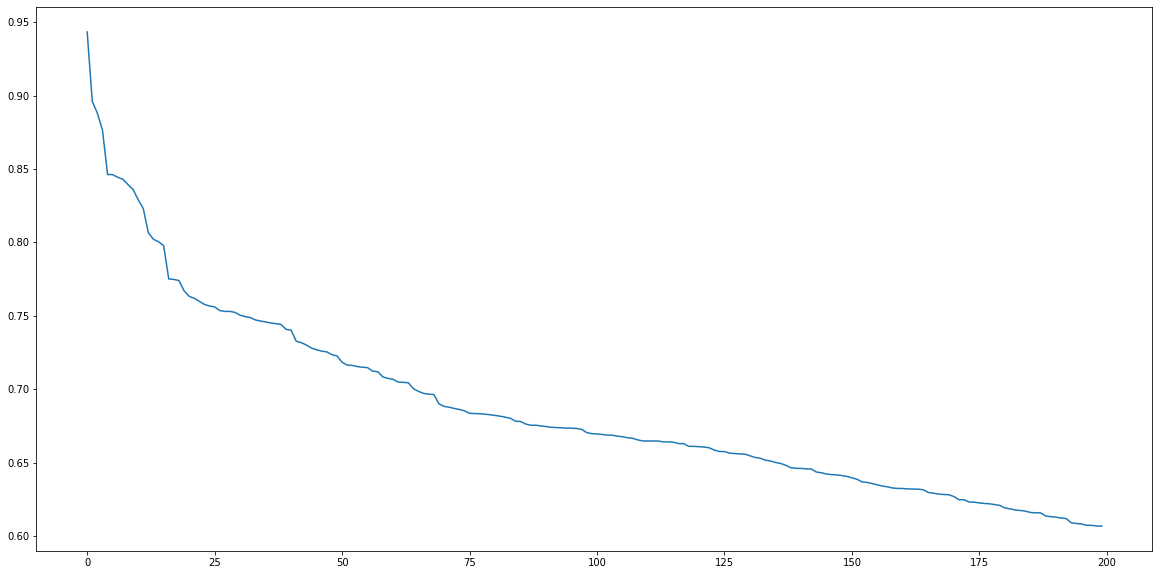

In [79]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(len(values))][0:200], values[0:200])